<h3><strong> Notebook ini digunakan untuk Scraping data dari Google Play Store 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google_play_scraper import reviews, Sort
result, continuation_token = reviews(
    app_id= 'com.gojek.app',
    lang = 'id',
    country = 'id',
    sort = Sort.MOST_RELEVANT,
    count = 50000,
    filter_score_with = None
)

In [ ]:
continuation_token

In [ ]:
# UNTUK MENGAMBIL SCRAPING BERIKUTNYA TANPA MENGAMBIL KOMENTAR YG SUDAH DIAMBIL

saved_continuation_token = continuation_token

result, continuation_token = reviews(
    app_id='com.gojek.app',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=50000,
    filter_score_with=None,
    continuation_token=saved_continuation_token
)

In [ ]:
# CONVERT TO CSV

data = []
for review in result:
    data.append({
        'user' : review['userName'],
        'rating' : review['score'],
        'tanggal' : review['at'],
        'like' : review['thumbsUpCount'],
        'komentar' : review['content']
    })

# CONVERT TO DATAFRAME
df = pd.DataFrame(data)

# SAVE TO CSV
df.to_csv(path_or_buf = 'gojek-reviews_4.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
result

[{'reviewId': '595da86c-acc1-4a64-ae43-90ff85eaf53d',
  'userName': 'Pengguna Google',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'terlalu terlalu terlalu... apk yg tidak bisa di percaya. kuota cepat abis minta update terus. tp bug tmbah banyak. hp jd lelet !!!.. kok bisa nyuri data pribadi ya... diliat dari apk yg terus berjln dilatar belakang dan terus mengirim data. tp g tau data ap yg dikirim ?? wah wah wah... bahaya bobol bisa atm wkwkwk',
  'score': 1,
  'thumbsUpCount': 1,
  'reviewCreatedVersion': '4.31.1',
  'at': datetime.datetime(2022, 4, 21, 20, 37, 7),
  'replyContent': 'Hai, mohon maaf atas kendala yang kamu alami. Mengenai kendala tersebut, silakan laporkan melalui email ke customerservice@go-jek.com dengan melampirkan kode psr-22-112-0133-51987 pada subject email agar tim kami bisa bantu cek lebih lanjut. ^Viska',
  'repliedAt': datetime.datetime(2022, 4, 22, 8, 

In [3]:
# LOAD SCRAPPED DATASET

df_1 = pd.read_csv(r'gojek-reviews.csv', sep=',')
df_2 = pd.read_csv(r'gojek-reviews_2.csv', sep=',')
df_3 = pd.read_csv(r'gojek-reviews_3.csv', delimiter = ',')

# GABUNGKAN KETIGA DATASET MENJADI 1 DATASET BESAR
df_final = pd.concat((df_1, df_2, df_3), axis = 0)

df_final

,user,rating,tanggal,like,Komentar
0,Pengguna Google,5,2025-05-15 22:24:23,0,"mantab, lebih baik dari aplikasi sebelah."
1,Pengguna Google,5,2025-05-15 22:19:36,0,Baik
2,Pengguna Google,5,2025-05-15 22:12:06,0,ok banget
3,Pengguna Google,5,2025-05-15 22:11:42,0,yaudah oke makasih banyak
4,Pengguna Google,1,2025-05-15 22:07:12,0,klo order GO-RIDE sering banget dapat driver y...
...,...,...,...,...,...
4495,Pengguna Google,2,2024-10-02 11:15:50,0,Akhir2 ini make gofud susah banget dapet drive...
4496,Pengguna Google,1,2020-08-25 10:26:18,0,"merasa kurang nyaman, Driver nya bnyak yg Jute..."
4497,Pengguna Google,1,2024-08-02 21:38:07,0,"makin lama makin buruk pelayanan nya, pengirim..."
4498,Pengguna Google,1,2021-09-21 17:29:12,0,Nomor laporan 83296933 tidak ada kabar lagi. C...


In [4]:
# BERIKAN SENTIMENT UNTUK SETIAP KOMENTAR

condition = [
    df_final['rating'] >= 4,
    df_final['rating'] <= 3
]

choices = ['positif', 'negatif']

df_final['sentiment'] = np.select(condlist = condition, choicelist = choices, default = 'unknown')

df_final

,user,rating,tanggal,like,Komentar,sentiment
0,Pengguna Google,5,2025-05-15 22:24:23,0,"mantab, lebih baik dari aplikasi sebelah.",positif
1,Pengguna Google,5,2025-05-15 22:19:36,0,Baik,positif
2,Pengguna Google,5,2025-05-15 22:12:06,0,ok banget,positif
3,Pengguna Google,5,2025-05-15 22:11:42,0,yaudah oke makasih banyak,positif
4,Pengguna Google,1,2025-05-15 22:07:12,0,klo order GO-RIDE sering banget dapat driver y...,negatif
...,...,...,...,...,...,...
4495,Pengguna Google,2,2024-10-02 11:15:50,0,Akhir2 ini make gofud susah banget dapet drive...,negatif
4496,Pengguna Google,1,2020-08-25 10:26:18,0,"merasa kurang nyaman, Driver nya bnyak yg Jute...",negatif
4497,Pengguna Google,1,2024-08-02 21:38:07,0,"makin lama makin buruk pelayanan nya, pengirim...",negatif
4498,Pengguna Google,1,2021-09-21 17:29:12,0,Nomor laporan 83296933 tidak ada kabar lagi. C...,negatif


In [5]:
# CEK BERAPA BANYAK UNIQUE LABEL 

display(df_final['sentiment'].unique())

display(df_final['sentiment'].value_counts())

array(['positif', 'negatif'], dtype=object)

sentiment
negatif    39311
positif    20189
Name: count, dtype: int64

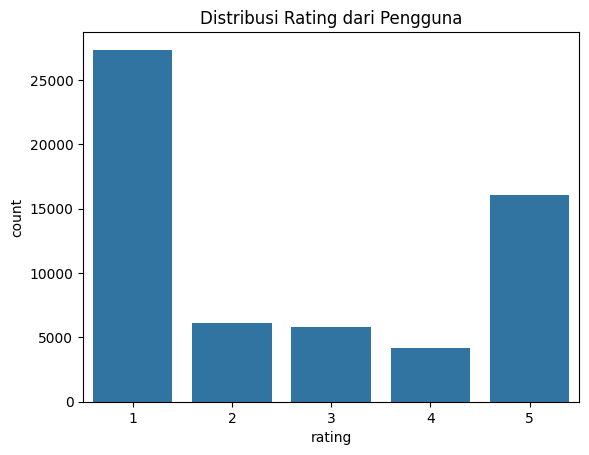

In [6]:
# CEK DISTRIBUSI RATING

sns.countplot(data = df_final, x = 'rating')

plt.title('Distribusi Rating dari Pengguna')
plt.show()

In [7]:
# AMBIL HANYA FITUR KOMENTAR DAN SENTIMENT

df_final = df_final[['Komentar', 'sentiment']]

df_final

,Komentar,sentiment
0,"mantab, lebih baik dari aplikasi sebelah.",positif
1,Baik,positif
2,ok banget,positif
3,yaudah oke makasih banyak,positif
4,klo order GO-RIDE sering banget dapat driver y...,negatif
...,...,...
4495,Akhir2 ini make gofud susah banget dapet drive...,negatif
4496,"merasa kurang nyaman, Driver nya bnyak yg Jute...",negatif
4497,"makin lama makin buruk pelayanan nya, pengirim...",negatif
4498,Nomor laporan 83296933 tidak ada kabar lagi. C...,negatif


In [8]:
# SIMPAN DATASET YG TELAH DIGABUNGKAN
df_final.to_csv(path_or_buf = 'data.csv', index = False, encoding = 'utf-8-sig')

In [9]:
# REMOVE BOM

def remove_bom_csv(input_file='data.csv', output_file='clean_data.csv'):
    with open(input_file, 'r', encoding='utf-8-sig') as f:
        content = f.read()

    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(content)

remove_bom_csv()
